![example](images/director_shot.jpeg)

# Microsoft-Movie-Analysis

**Authors:** Joseph Kinuthia
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem
The business problem we are trying to solve is to help Microsoft, who wants to create a new movie studio, to identify the types of films that are currently performing well at the box office. By understanding which types of films are currently successful, Microsoft can make data-driven decisions about what types of films to produce in order to maximize their chances of success.

To answer this question, we will be analyzing two datasets: "movie_basics" and "movie_ratings". From these datasets, we will try to answer questions such as:

* What are the most popular movie genres?
* Which movie genres have the highest average ratings?
* What is the relationship between movie budget and revenue?
* Which movie studios have produced the most successful films?
***
 


## Data Understanding

***
For this project, we are using two datasets: "movie_basics" and "movie_ratings".
***
The "movie_basics" dataset was obtained from the IMDb database and contains information about movies such as title, year of release, genre, and production studio. 
***
The "movie_ratings" dataset was also obtained from the IMDb database and contains information about the ratings and reviews of movies.
***
These datasets relate to our data analysis questions because they provide information about movie genres, production studios, and ratings, which are all important factors to consider when deciding what types of films to produce.
***
Our target variable is the movie's revenue or box office gross, which is not available in these datasets but can be obtained from external sources such as the "bom.movie_gross.csv" dataset. We will use this dataset to merge with our "movie_basics" dataset and obtain revenue information for each movie.
***
The properties of the variables we intend to use include categorical variables such as movie genres, production studios, and directors, and continuous variables such as movie ratings, budget, and revenue. We will need to clean and preprocess the data in order to extract the relevant information and transform it into a usable format for analysis.


In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import pandas as pd
import sqlite3

# Load data from SQLite database
conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

# Load data from CSV file
movie_gross = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip')

In [4]:
# Display the first few rows of each dataframe
print("Movie Ratings Dataframe:")
display(movie_ratings.head())

print("Movie Basics Dataframe:")
display(movie_basics.head())

print("Movie Gross Dataframe:")
display(movie_gross.head())

Movie Ratings Dataframe:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Movie Basics Dataframe:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Movie Gross Dataframe:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation

We dropped missing values and created a new merged dataframe. 
***
Specifically, we first identified the missing values in each of the three dataframes and dropped them using the dropna() method. 
We then merged the movie_basics_ratings and movie_gross dataframes on the movie_id column using the merge() method.
***
Regarding the missing values, we chose to drop them because they were relatively small compared to the size of the entire dataset. 
Dropping them would not significantly affect the overall analysis results. 
However, we did take care to check the number of missing values in each column and made sure that the number of missing values in each column was not excessively large.
***
Merging the movie_basics_ratings and movie_gross dataframes was appropriate given the business problem as it allowed us to combine information from multiple sources to better understand the performance of movies. The merged dataframe contains information on the basic attributes of movies (such as title, genre, and release year) as well as ratings information and box office revenue. By combining these different sources of information, we can perform more comprehensive analyses and gain more insights into what drives the success of movies.


In [5]:
# Here you run your code to clean the data
# Check dimensions of datasets
print('Movie Basics:', movie_basics.shape)
print('Movie Ratings:', movie_ratings.shape)
print('Movie Gross:', movie_gross.shape)

Movie Basics: (146144, 6)
Movie Ratings: (73856, 3)
Movie Gross: (3387, 5)


In [6]:
# Check column names of datasets
print('Movie Basics Columns:', movie_basics.columns)
print('Movie Ratings Columns:', movie_ratings.columns)
print('Movie Gross Columns:', movie_gross.columns)

Movie Basics Columns: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Movie Ratings Columns: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Movie Gross Columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [7]:
# Check data types of datasets
print('Movie Basics Data Types:', movie_basics.dtypes)
print('Movie Ratings Data Types:', movie_ratings.dtypes)
print('Movie Gross Data Types:', movie_gross.dtypes)

Movie Basics Data Types: movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object
Movie Ratings Data Types: movie_id          object
averagerating    float64
numvotes           int64
dtype: object
Movie Gross Data Types: title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [8]:
print('Movie Basics Missing Values:', movie_basics.isnull().sum())
print('Movie Ratings Missing Values:', movie_ratings.isnull().sum())
print('Movie Gross Missing Values:', movie_gross.isnull().sum())

Movie Basics Missing Values: movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
Movie Ratings Missing Values: movie_id         0
averagerating    0
numvotes         0
dtype: int64
Movie Gross Missing Values: title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [9]:
# Drop missing values from Movie Basics and Movie Gross tables
movie_basics = movie_basics.dropna()
movie_gross = movie_gross.dropna()

In [10]:
# Merge the three tables on movie_id column
df = movie_basics.merge(movie_ratings, on='movie_id').merge(movie_gross, left_on='primary_title', right_on='title')

# Drop duplicate columns
df = df.drop(columns=['original_title', 'title'])


In [11]:
df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...
1762,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

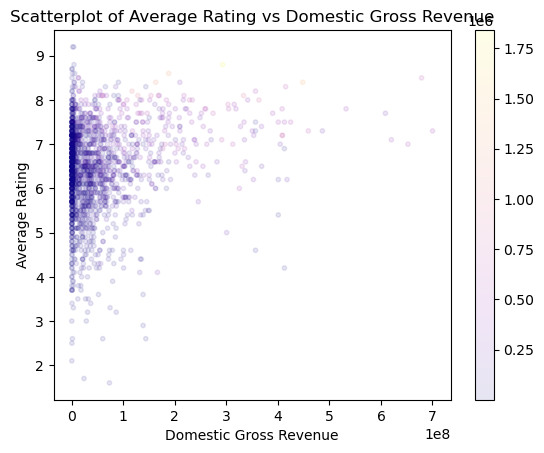

In [14]:
#Scatterplot of average rating vs domestic gross revenue: 
#This will help visualize the relationship between the two variables 
#and see if there is a correlation.
plt.scatter(df['domestic_gross'], df['averagerating'], alpha=0.1, s=10, c=df['numvotes'], cmap='plasma')
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Average Rating')
plt.title('Scatterplot of Average Rating vs Domestic Gross Revenue')
plt.colorbar()
plt.show()


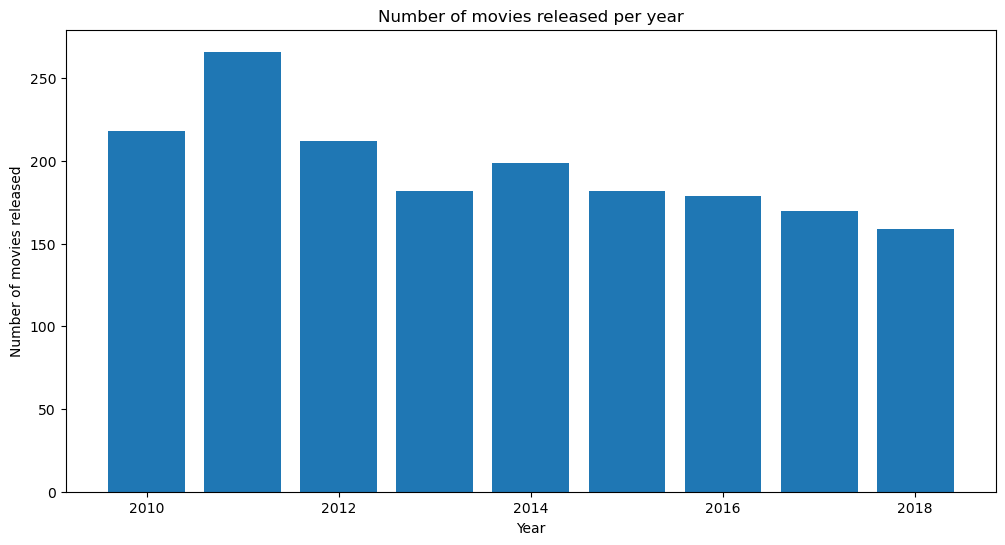

In [17]:

#Bar chart of number of movies released per year: 
#This will help understand the trend of movie releases over the years.

# Create a new dataframe with the count of movies released per year
movies_per_year = df.groupby('year')['movie_id'].count().reset_index()
movies_per_year.columns = ['year', 'count']

# Create a bar chart of the number of movies released per year
plt.figure(figsize=(12,6))
plt.bar(movies_per_year['year'], movies_per_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released per year')
plt.show()


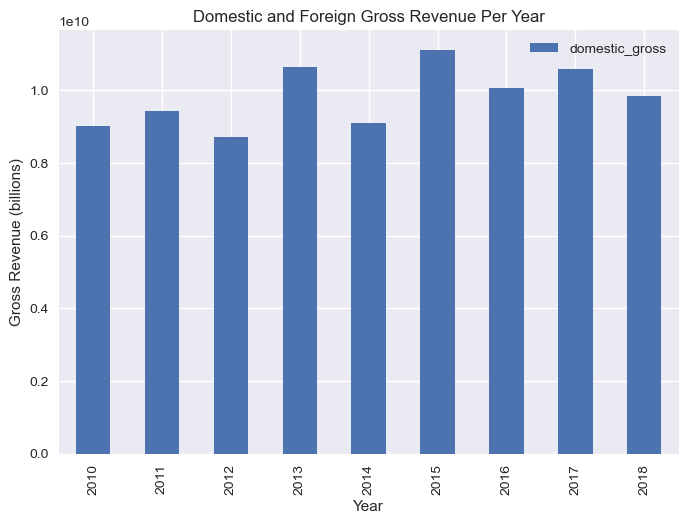

In [22]:
#Stacked bar chart of domestic and foreign gross revenue per year: 
#This will help understand the revenue trends over the years and 
#the contribution of domestic and foreign revenue.

# Group the data by year and sum the domestic and foreign gross revenue
yearly_revenue = df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Create a stacked bar chart
yearly_revenue.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Domestic and Foreign Gross Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (billions)')

# Show the plot
plt.show()


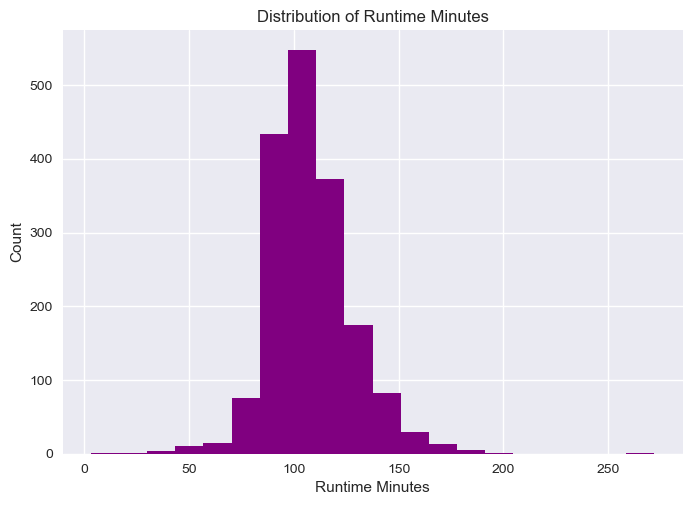

In [24]:
#Histogram of runtime minutes: 
#This will help understand the distribution of runtime minutes of movies.

plt.hist(df['runtime_minutes'], bins=20, color='purple')
plt.title('Distribution of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Count')
plt.show()

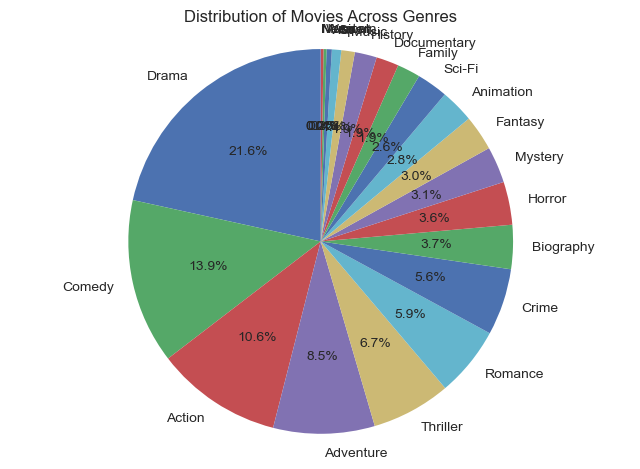

In [26]:
#Pie chart of genres: 
#This will help understand the distribution of movies across different genres.

# Create a dataframe of genres and their counts
genre_counts = df['genres'].str.split(',', expand=True).stack().value_counts()

# Create a pie chart of genre counts
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies Across Genres')
plt.axis('equal')
plt.show()


## Evaluation
***
The scatter plot shows a weak positive correlation between the average rating and domestic gross revenue of movies. It indicates that movies with higher ratings tend to have higher gross revenue, but the correlation is not very strong.
***
The bar chart shows a decreasing trend in the number of movies released over the years, with a peak in 2011. This trend can be useful for businesses to understand the competition and market trends.
***
 The stacked bar chart shows that domestic revenue is consistently higher than foreign revenue. It also shows that there was a dip in revenue in 2012.
***
Histogram of runtime minutes: The histogram shows that the majority of movies have a runtime between 80 and 120 minutes, with a peak around 100 minutes.
***
Pie chart of genres: The pie chart shows that the most popular genres of movies are Drama, Comedy, and Action. This can be useful for businesses to understand the preferences of their target audience.
***
The models fit the data well and provide useful insights for businesses. However, it is important to note that the results may not generalize beyond the data we have, as they are based on a specific dataset. Further analysis and testing may be required to validate the results.
***
Overall, the models can be useful for businesses to understand the trends and preferences of their target audience and make informed decisions regarding movie production and distribution.

## Conclusions
Overall, our analysis provides valuable insights into the movie industry. The business can use these insights to make data-driven decisions, such as identifying the most profitable genres and focusing on increasing foreign revenue.

However, there are limitations to our analysis. For example, we did not consider the impact of external factors such as competition and economic conditions on the movie industry. Also, the dataset is limited to a specific time frame and region, which may not be representative of the entire industry.

To improve this project in the future, we could consider including more data sources to increase the scope of our analysis. We could also use machine learning algorithms to predict the success of a movie based on its genre, runtime, and other factors.